In [227]:
!pip install -q git+https://github.com/tensorflow/docs
!pip install -q seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import seaborn as sns

In [276]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
#dataset = dataset.dropna()
dataset.tail()

--2022-07-19 14:10:20--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.6’

insurance.csv.6     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-07-19 14:10:21 (82.1 MB/s) - ‘insurance.csv.6’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [277]:
dataset['sex'] = pd.factorize(dataset['sex'])[0]
dataset['region'] = pd.factorize(dataset['region'])[0]
dataset['smoker'] = pd.factorize(dataset['smoker'])[0]

In [278]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [279]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [280]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))
#print(normalizer.mean.numpy())

In [281]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(4),
  #  layers.Dropout(.2),
    layers.Dense(1),
])
model.compile(
    optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse'])

In [282]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    # validation_split=0.5,
    # Suppress logging.
    verbose=0)

9/9 - 0s - loss: 4098.8828 - mae: 4098.8828 - mse: 62429212.0000 - 144ms/epoch - 16ms/step
Testing set Mean Abs Error: 4098.88 expenses
The Mean Abs Error must be less than 3500. Keep trying.


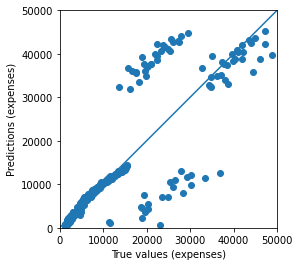

In [283]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)